In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/home/vituri/Documentos/GitHub/TDA_workshop_EBT2024"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [2]:
using Meshes, GeoIO
import GLMakie as gl
using ProgressMeter
using Chain

In [3]:
read_mesh(filepath) = GeoIO.load(filepath).geometry

plot_mesh(ms) = viz(ms);

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


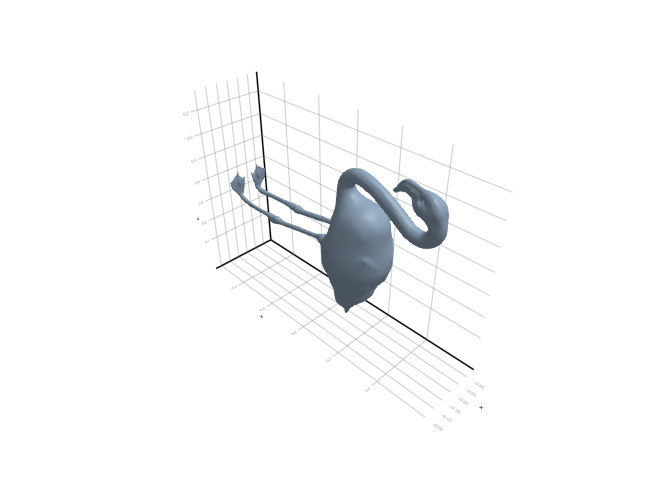

In [4]:
filepath = "meshes/flamingo-poses/flam-reference.obj"
ms = read_mesh(filepath)

plot_mesh(ms)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


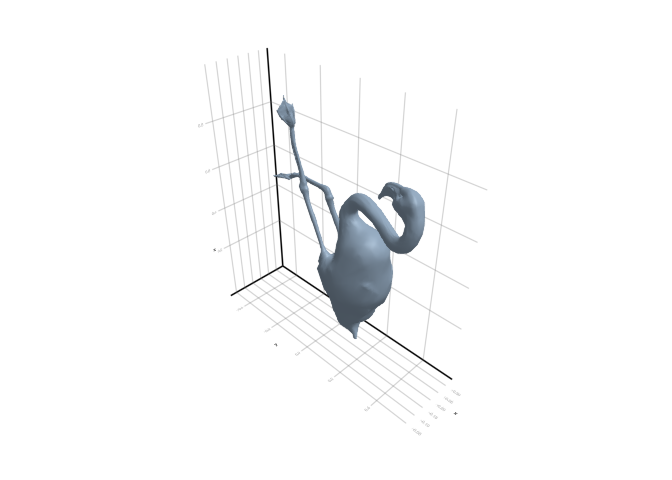

In [5]:
ms2 = read_mesh("meshes/flamingo-poses/flam-01.obj")

plot_mesh(ms2)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


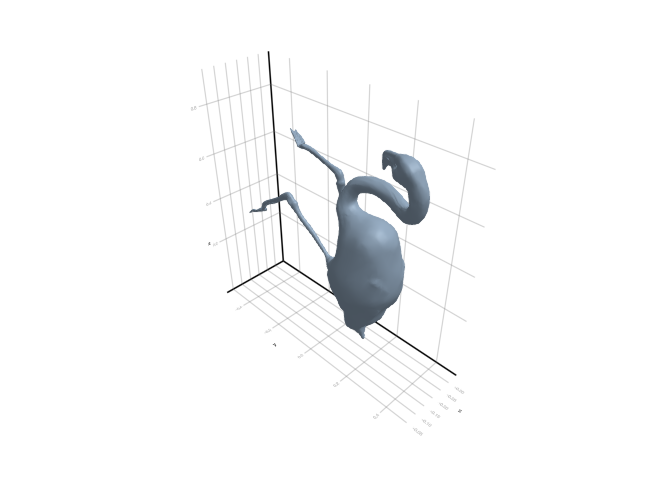

In [6]:
ms2 = read_mesh("meshes/flamingo-poses/flam-02.obj")

plot_mesh(ms2)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


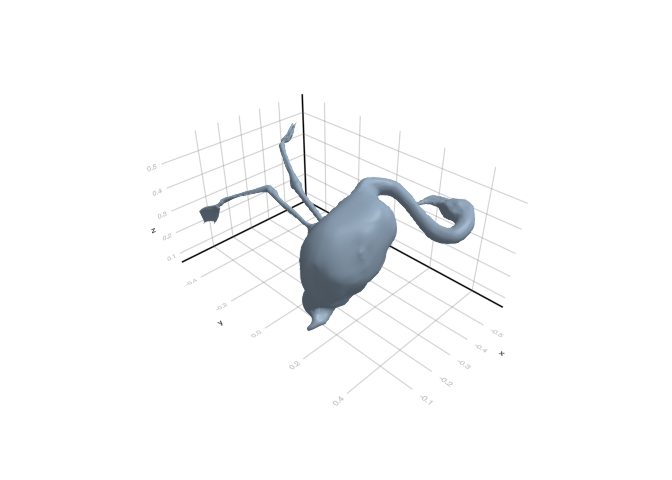

In [7]:
ms2 = read_mesh("meshes/flamingo-poses/flam-03.obj")

plot_mesh(ms2)

In [8]:
filter(!isfile, readdir("meshes/", join = true))

8-element Vector{String}:
 "meshes/camel-poses"
 "meshes/cat-poses"
 "meshes/elephant-poses"
 "meshes/face-poses"
 "meshes/flamingo-poses"
 "meshes/head-poses"
 "meshes/horse-poses"
 "meshes/lion-poses"

In [9]:
using MetricSpaces

mesh_to_metric_space(ms) = ms.vertices .|> coordinates .|> Vector |> EuclideanSpace;

In [10]:
X = mesh_to_metric_space(ms)

26907-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.0497887, 0.179158, 0.304686]
 [-0.0478521, 0.176355, 0.337555]
 [-0.0489072, 0.170843, 0.36641]
 [-0.0479558, 0.154587, 0.319926]
 [-0.0484908, 0.148718, 0.356395]
 [-0.0549708, 0.129732, 0.300859]
 [-0.0529351, 0.125235, 0.325443]
 [-0.0537256, 0.124306, 0.346663]
 [-0.0569744, 0.201286, 0.371339]
 [-0.0536567, 0.19095, 0.297565]
 [-0.0522451, 0.191074, 0.306529]
 [-0.0571656, 0.181709, 0.282749]
 [-0.0524422, 0.185973, 0.296856]
 ⋮
 [-0.209925, 0.44, 0.658976]
 [-0.20707, 0.420017, 0.655563]
 [-0.210662, 0.444178, 0.660018]
 [-0.211038, 0.441635, 0.658588]
 [-0.208734, 0.420334, 0.651864]
 [-0.211586, 0.429432, 0.654244]
 [-0.210811, 0.425791, 0.653265]
 [-0.210709, 0.423044, 0.649643]
 [-0.211377, 0.439884, 0.657541]
 [-0.211205, 0.437203, 0.65695]
 [-0.211346, 0.434063, 0.656262]
 [-0.212218, 0.433793, 0.654967]

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


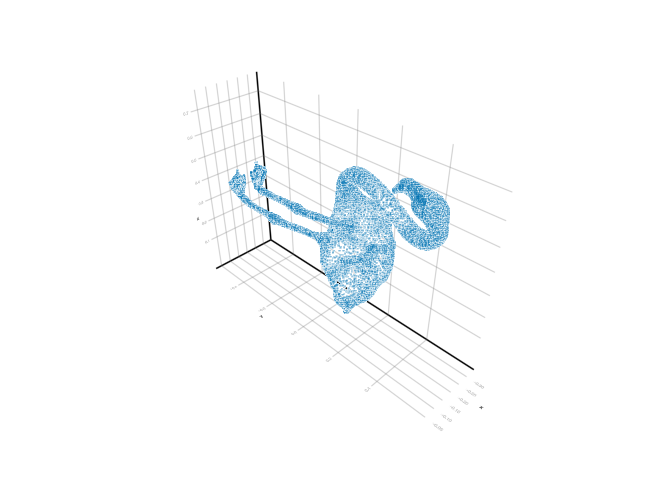

In [11]:
gl.scatter(X, markersize = 1)

In [12]:
using Graphs, SimpleWeightedGraphs;

In [13]:
#| code-fold: true
function graph_from_mesh(ms)
    # the set of vertices
    V = coordinates.(ms.vertices)

    # create an empty graph
    g = SimpleWeightedGraph()

    # add n vertices to it
    n = length(V)
    add_vertices!(g, n)

    # the set of triangles of the mesh ms
    triangles = ms.topology.connec

    # for each triangle, add its edges to the graph
    @showprogress desc = "Adding vertices to graph..." for t ∈ triangles
        v1, v2, v3 = t.indices
        add_edge!(g, v1, v2, dist_euclidean(V[v1], V[v2]))
        add_edge!(g, v1, v3, dist_euclidean(V[v1], V[v3]))
        add_edge!(g, v2, v3, dist_euclidean(V[v2], V[v3]))
    end

    g
end;

In [14]:
g = graph_from_mesh(ms)

Adding vertices to graph...   0%|                        |  ETA: 1:24:47

Adding vertices to graph... 100%|████████████████████████| Time: 0:00:01


{26907, 79244} undirected simple Int64 graph with Float64 weights

In [15]:
weights(g)

26907×26907 SparseArrays.SparseMatrixCSC{Float64, Int64} with 158488 stored entries:
⎡⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣶⣶⣖⣆⣀⡀⢀⡀⠀⠀⠀⠀⠀⠀⠀⠤⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠈⢋⠛⠿⡿⣿⣿⣾⣆⣀⡀⠀⠀⠀⠀⠀⠉⠛⠿⢤⡀⠀⠀⠈⠁⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠛⠻⠿⠷⠷⣦⣀⡀⠀⠀⠀⠀⠀⠉⠙⠂⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒⠠⠠⠄⡀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠳⢤⣄⣀⠀⠀⠀⠐⢦⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠐⠒⠀⠀⠀⠀⠀⠀⢀⡀⠀⠈⠉⠛⠳⠶⣤⣈⠙⎥
⎢⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠰⣦⣤⣠⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠈⠉⠂⠀⠀⠀⠉⠛⎥
⎢⢻⣿⡀⠀⠀⠀⠀⠀⠀⠀⠀⣻⣿⣿⣿⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢸⢿⡦⢀⠀⠀⢠⠀⠀⠀⠀⠐⠛⢿⢿⣷⣷⡤⡄⢐⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠈⢹⣿⡄⠀⠀⠀⡂⠀⠀⠀⠀⠀⠀⠙⡿⣿⣿⣷⣾⣄⢀⡀⠀⠀⠀⠀⠀⠀⠀⠑⣖⠂⠀⠀⠀⠀⠀⠂⠀⎥
⎢⠀⢈⣿⣯⡀⠀⠀⠡⡀⠀⠀⠀⠀⠀⢀⢉⣹⣿⣿⣿⣼⣕⣀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢷⡄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⣻⣿⣷⠀⠀⠀⢃⠀⠀⠀⠀⠀⠀⠀⠀⢙⢖⢿⣿⣿⣧⣲⣀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣄⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⢹⣿⡆⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠘⢩⣻⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠹⣧⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⢽⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠙⢿⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠃⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⢻⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠻⣦⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢧⠀⠀⠀⠈⣧⠀⠀⢀⠀⠀⠈⠘⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡄⠀⠀⠀⠀⠀⠀⢀⠀⠀⎥
⎢⠀⠈⣧⠀⠀⠀⠙⣆⠀⠈⠆⠀⠀⠀⠀⠉⢱⢤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣦⡀⠀⠀⠀⠀⠘⢲⠀⎥
⎢⠀⠀⠛⣇⠀⠀⠀⢹⡆⠀⡆⠀⠀⠀⠀⠀⠈⠀⠙⠷⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⢰⣀⎥
⎢⠀⠀⠀⠈⣇⠀⠀⠀⢿⡀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣀⠀⠀⠙⎥
⎢⠀⠀⡀⠀⠈⠀⢀⠀⠘⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⢀⣀⠀⠀⠀⠀⠘⠻⣦⡀⠀⎥
⎣⠀⠀⠁⠀⠀⠀⠈⠓⣆⠘⣧⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠒⠐⢲⣄⠀⠀⠈⠻⣦⎦

In [16]:
is_connected(g)

false

In [17]:
connected_components(g)

514-element Vector{Vector{Int64}}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  26898, 26899, 26900, 26901, 26902, 26903, 26904, 26905, 26906, 26907]
 [4032]
 [4036]
 [4039]
 [4042]
 [4046]
 [4047]
 [4048]
 [4049]
 [4050]
 [4077]
 [4099]
 [4100]
 ⋮
 [7089]
 [7090]
 [7091]
 [7092]
 [7093]
 [7094]
 [7095]
 [7096]
 [7097]
 [7098]
 [7099]
 [7100]

In [18]:
function extract_biggest_connected_component(g)
    cc_components = connected_components(g)
    ids_biggest_component = cc_components[findmax(length, cc_components)[2]]

    # modify the graph g on place
    g = g[ids_biggest_component]

    # return g and the ids of the biggest connected component
    g, ids_biggest_component
end;

In [19]:
g, ids_biggest_component = extract_biggest_connected_component(g);

In [20]:
is_connected(g)

true

In [21]:
X = X[ids_biggest_component]

26394-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.0497887, 0.179158, 0.304686]
 [-0.0478521, 0.176355, 0.337555]
 [-0.0489072, 0.170843, 0.36641]
 [-0.0479558, 0.154587, 0.319926]
 [-0.0484908, 0.148718, 0.356395]
 [-0.0549708, 0.129732, 0.300859]
 [-0.0529351, 0.125235, 0.325443]
 [-0.0537256, 0.124306, 0.346663]
 [-0.0569744, 0.201286, 0.371339]
 [-0.0536567, 0.19095, 0.297565]
 [-0.0522451, 0.191074, 0.306529]
 [-0.0571656, 0.181709, 0.282749]
 [-0.0524422, 0.185973, 0.296856]
 ⋮
 [-0.209925, 0.44, 0.658976]
 [-0.20707, 0.420017, 0.655563]
 [-0.210662, 0.444178, 0.660018]
 [-0.211038, 0.441635, 0.658588]
 [-0.208734, 0.420334, 0.651864]
 [-0.211586, 0.429432, 0.654244]
 [-0.210811, 0.425791, 0.653265]
 [-0.210709, 0.423044, 0.649643]
 [-0.211377, 0.439884, 0.657541]
 [-0.211205, 0.437203, 0.65695]
 [-0.211346, 0.434063, 0.656262]
 [-0.212218, 0.433793, 0.654967]

In [22]:
ids_fps = farthest_points_sample(X, 400);
X_fps = X[ids_fps]

Progress:   1%|▎                                        |  ETA: 0:00:57

Progress:  30%|████████████▍                            |  ETA: 0:00:01

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


400-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.112233, 0.0866622, 0.420482]
 [-0.270087, -0.46859, 0.403179]
 [-0.195649, 0.502407, 0.660994]
 [-0.180246, 0.116642, 0.00512551]
 [-0.117747, -0.208774, 0.308355]
 [-0.235742, 0.266743, 0.238924]
 [-0.185174, 0.219718, 0.657891]
 [-0.272514, 0.227771, 0.458663]
 [-0.137912, 0.0885697, 0.207687]
 [-0.244429, -0.050203, 0.342568]
 [-0.167691, 0.386004, 0.507554]
 [-0.122856, -0.398869, 0.308215]
 [-0.101378, 0.270424, 0.368374]
 ⋮
 [-0.110045, 0.246447, 0.235545]
 [-0.140942, 0.131223, 0.552478]
 [-0.22321, -0.158624, 0.325748]
 [-0.175252, 0.518914, 0.597069]
 [-0.150615, 0.0485658, 0.336715]
 [-0.153214, 0.162016, 0.552285]
 [-0.222172, -0.433636, 0.328227]
 [-0.2454, 0.213845, 0.181462]
 [-0.204097, 0.235733, 0.635077]
 [-0.191407, 0.222321, 0.140817]
 [-0.209602, 0.493935, 0.600887]
 [-0.0578201, 0.143362, 0.277584]

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


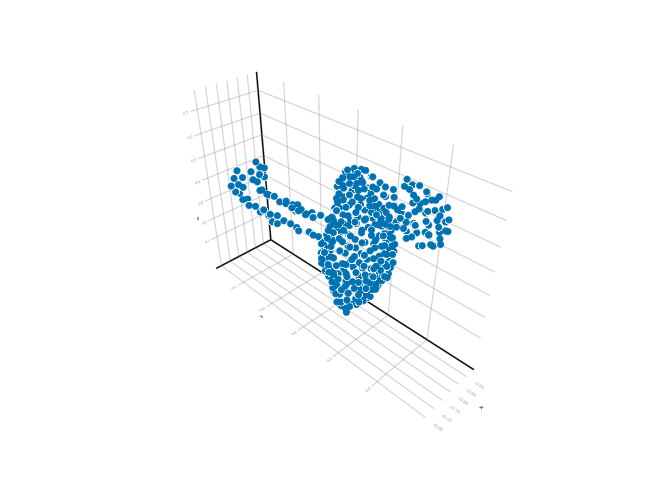

In [23]:
gl.scatter(X_fps, markersize = 10)

In [24]:
function geodesic_distance_from_graph(g, ids)
    n = length(ids)
    D = zeros(n, n)

    # for each point, calculate the distance from it to every other point of g
    @showprogress desc = "Calculating geodesic distance..." Threads.@threads for (i, id) ∈ collect(enumerate(ids))
        dts = dijkstra_shortest_paths(g, id)
        D[i, :] = dts.dists[ids]
    end

    # force simmetry on X, because of small difference
    # in the calculation of paths
    for i ∈ 1:n
        for j ∈ i:n
            D[i, j] = D[j, i]
        end
    end

    # normalize the distance so the max is 1
    max_dist = maximum(D)
    D = D ./ max_dist

    return D
end;

In [25]:
D = geodesic_distance_from_graph(g, ids_fps)

Calculating geodesic distance...   0%|▏                  |  ETA: 0:00:37

Calculating geodesic distance...   4%|▊                  |  ETA: 0:00:07

Calculating geodesic distance...   8%|█▍                 |  ETA: 0:00:05

Calculating geodesic distance...  11%|██                 |  ETA: 0:00:04

Calculating geodesic distance...  14%|██▊                |  ETA: 0:00:04

Calculating geodesic distance...  18%|███▍               |  ETA: 0:00:03

Calculating geodesic distance...  21%|████               |  ETA: 0:00:03

Calculating geodesic distance...  25%|████▊              |  ETA: 0:00:03

Calculating geodesic distance...  28%|█████▍             |  ETA: 0:00:03

Calculating geodesic distance...  32%|██████             |  ETA: 0:00:02

Calculating geodesic distance...  35%|██████▋            |  ETA: 0:00:02

Calculating geodesic distance...  38%|███████▏           |  ETA: 0:00:02

Calculating geodesic distance...  41%|███████▉           |  ETA: 0:00:02

Calculating geodesic distance...  45%|████████▌          |  ETA: 0:00:02

Calculating geodesic distance...  48%|█████████▏         |  ETA: 0:00:02

Calculating geodesic distance...  52%|█████████▉         |  ETA: 0:00:02

Calculating geodesic distance...  55%|██████████▌        |  ETA: 0:00:02

Calculating geodesic distance...  59%|███████████▏       |  ETA: 0:00:01

Calculating geodesic distance...  62%|███████████▉       |  ETA: 0:00:01

Calculating geodesic distance...  66%|████████████▌      |  ETA: 0:00:01

Calculating geodesic distance...  69%|█████████████▏     |  ETA: 0:00:01

Calculating geodesic distance...  72%|█████████████▊     |  ETA: 0:00:01

Calculating geodesic distance...  76%|██████████████▍    |  ETA: 0:00:01

Calculating geodesic distance...  79%|███████████████    |  ETA: 0:00:01

Calculating geodesic distance...  82%|███████████████▋   |  ETA: 0:00:01

Calculating geodesic distance...  86%|████████████████▎  |  ETA: 0:00:00

Calculating geodesic distance...  89%|████████████████▉  |  ETA: 0:00:00

Calculating geodesic distance...  92%|█████████████████▋ |  ETA: 0:00:00

Calculating geodesic distance...  96%|██████████████████▎|  ETA: 0:00:00

Calculating geodesic distance...  99%|██████████████████▉|  ETA: 0:00:00

Calculating geodesic distance... 100%|███████████████████| Time: 0:00:03


400×400 Matrix{Float64}:
 0.0        0.509655   0.471238   …  0.28399    0.425611   0.122963
 0.509655   0.0        0.915987      0.640388   0.870335   0.56314
 0.471238   0.915987   0.0           0.709378   0.0456516  0.578362
 0.314292   0.658857   0.776076      0.127292   0.730425   0.211552
 0.231143   0.639373   0.694694      0.425716   0.649067   0.276069
 0.300898   0.620241   0.62736    …  0.0830235  0.581708   0.200756
 0.233487   0.67336    0.273646      0.47101    0.228773   0.342624
 0.224002   0.578603   0.464572      0.244905   0.418921   0.279676
 0.166744   0.522447   0.63356       0.172485   0.587908   0.0876862
 0.173704   0.341034   0.580658      0.299355   0.535007   0.225272
 0.33607    0.785519   0.170587   …  0.578191   0.124935   0.444561
 0.360618   0.769569   0.823749      0.556968   0.778123   0.407321
 0.165547   0.665299   0.538465      0.18395    0.492813   0.122524
 ⋮                                ⋱                        
 0.208887   0.653843   0.627879

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


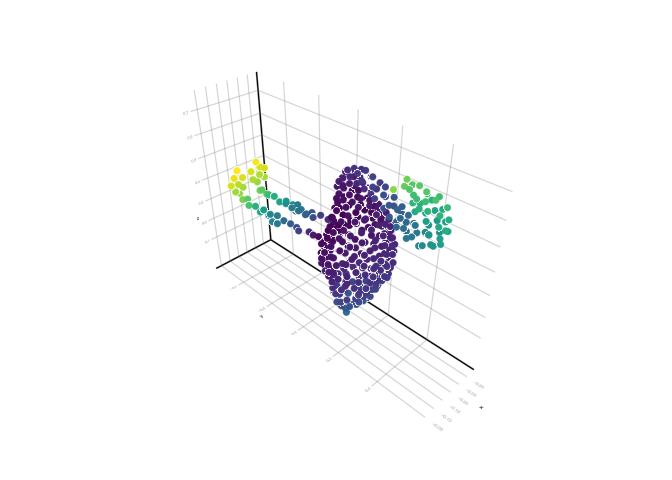

In [26]:
exc = map(sum, eachcol(D))

gl.scatter(X_fps, color = exc, markersize = 10)

In [27]:
import Ripserer
import PersistenceDiagrams as Pd
import Plots

In [28]:
pd = Ripserer.ripserer(D, dim_max = 2, verbose=true, sparse = true, threshold = 0.8)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/dMfiC/src/ProgressMeter.jl:594
Computing 2d intervals... 100%|█████████████████████████| Time: 0:00:12
  intervals:  16


Done. Time: 0:00:22


3-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 400-element 0-dimensional PersistenceDiagram
 208-element 1-dimensional PersistenceDiagram
 16-element 2-dimensional PersistenceDiagram

In [29]:
function plot_barcode(pd)
    # get the size of the longest interval
    threshold = 
        @chain begin
            vcat(pd...)
            last.(_)
            filter(isfinite, _)
            maximum
        end

    # plot the barcode using this interval as the maximum value of the x-axis
    Ripserer.barcode(pd, infinity = threshold)
end

plot_barcode (generic function with 1 method)

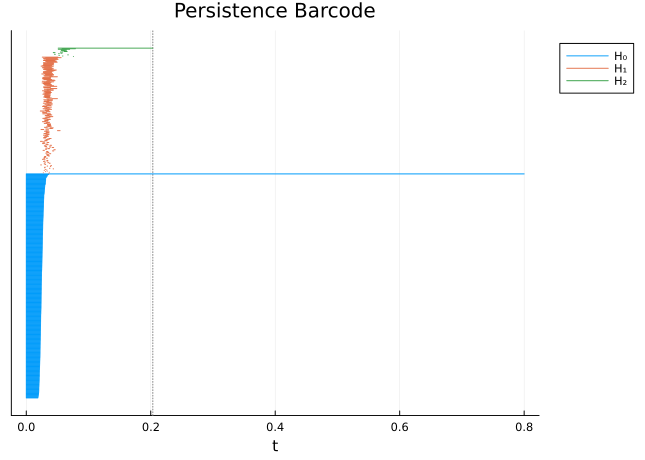

In [30]:
plot_barcode(pd)

In [31]:
function file_to_barcode(filepath; n_points = 1000, dim_max = 1)
    ms = read_mesh(filepath)

    X = mesh_to_metric_space(ms)
    g = graph_from_mesh(ms)

    g, ids_biggest_component = extract_biggest_connected_component(g)
    X = X[ids_biggest_component]

    ids_fps = farthest_points_sample(X, n_points);
    X_fps = X[ids_fps]

    D = geodesic_distance_from_graph(g, ids_fps)

    pd = Ripserer.ripserer(D, dim_max = dim_max, verbose=true, sparse = true, threshold = 0.8)

    return X_fps, D, pd
end;

In [32]:
using DataFramesMeta
using CSV

function pd_to_dataframe(pd)
    df = @chain begin
        map(pd) do p
            DataFrame(
                birth=p .|> first, death=p .|> last, dim=p.dim
            )
        end
        vcat(_...)
    end

    df
end

function dataframe_to_pd(df)
    df.threshold .= 1

    @chain df begin
        groupby(:dim)
        collect
        map(Pd.PersistenceDiagram, _)
    end
end

function metric_space_to_df(X) 
    @chain X_fps begin
        stack
        transpose
        DataFrame(_, :auto)
    end
end

function list_files(path="", pattern="")
    files =
        @chain begin
            map(walkdir(path)) do (root, dirs, files)
                joinpath.(root, files)
            end
            reduce(vcat, _)
            filter(x -> occursin(pattern, x), _)
        end

    files
end;

In [33]:
#| eval: false
overwrite_old_files = true

@showprogress "Calculating barcode..." for file ∈ list_files("meshes/", ".obj") 
    println("Calculating barcode from file $file ...")

    file_pd = replace(file, ".obj" => "-pd.csv")
    # skip if there is a file already
    if isfile(file_pd) & !overwrite_old_files continue end

    X_fps, D, pd = file_to_barcode(file, n_points = 350, dim_max = 2)
    df = pd_to_dataframe(pd)

    CSV.write(file_pd, df)

    file_X = replace(file, ".obj" => "-points.csv")
    CSV.write(file_X, metric_space_to_df(X_fps))
end

In [34]:
function throw_away_small_intervals(pd, min_pers = 0.01)
    map(pd) do p
        filter(x -> Pd.persistence(x) > min_pers, p)
    end
end;

In [35]:
#| code-fold: true
function read_pds_from_files(directory, min_interval_size = 0.05)
  pds_df = DataFrame()

#   file = list_files("meshes/", "-pd.csv")[1]
  for file ∈ list_files(directory, "-pd.csv")

      pd = @chain begin
          CSV.read(file, DataFrame)
          dataframe_to_pd(_)
          throw_away_small_intervals(min_interval_size)
      end

      name = replace(file, "-pd.csv" => "")
      push!(pds_df, (Path = name, Persistence_diagram = pd))
  end

  pds_df

  sort!(pds_df, :Path)

  pds_df.File = [split(s, "/")[3] for s ∈ pds_df.Path]
  pds_df.Class = [split(s, "-")[1] for s ∈ pds_df.File]

  pds_df
end;

In [36]:
pds_df = read_pds_from_files("meshes/", 0.01)

Row,Path,Persistence_diagram,File,Class
,String,Array…,SubStrin…,SubStrin…
1,meshes/camel-poses/camel-01,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 64-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-01,camel
2,meshes/camel-poses/camel-02,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 62-element 1-dimensional PersistenceDiagram, 5-element 2-dimensional PersistenceDiagram]",camel-02,camel
3,meshes/camel-poses/camel-03,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 79-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-03,camel
4,meshes/camel-poses/camel-04,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 75-element 1-dimensional PersistenceDiagram, 3-element 2-dimensional PersistenceDiagram]",camel-04,camel
5,meshes/camel-poses/camel-05,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 68-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-05,camel
6,meshes/camel-poses/camel-06,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 71-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-06,camel
7,meshes/camel-poses/camel-07,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 78-element 1-dimensional PersistenceDiagram, 4-element 2-dimensional PersistenceDiagram]",camel-07,camel
8,meshes/camel-poses/camel-08,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 73-element 1-dimensional PersistenceDiagram, 4-element 2-dimensional PersistenceDiagram]",camel-08,camel
9,meshes/camel-poses/camel-09,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 83-element 1-dimensional PersistenceDiagram, 5-element 2-dimensional PersistenceDiagram]",camel-09,camel


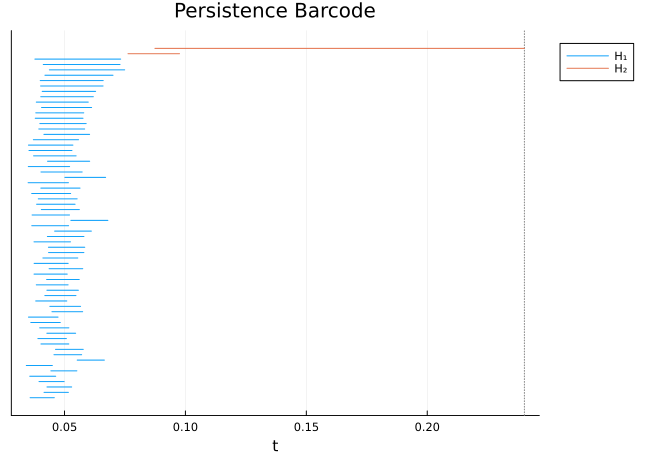

In [37]:
pd2 = pds_df.Persistence_diagram[1]
plot_barcode(pd2[2:3])

In [38]:
#| eval: false
pds = pds_df.Persistence_diagram

DB = zeros(83, 83)

@showprogress for i ∈ 1:83
    for j ∈ i:83
        if i == j
            DB[i, j] = 0 
            continue 
        end

        DB[i, j] = 
            Pd.Bottleneck()(pds[i][2], pds[j][2]) + 
            Pd.Bottleneck()(pds[i][3], pds[j][3])

        DB[j, i] = DB[i, j]
    end
end

CSV.write("meshes/bottleneck_distance.csv", DataFrame(DB, :auto))

In [39]:
DB = CSV.read("meshes/bottleneck_distance.csv", DataFrame) |> Matrix
DB

83×83 Matrix{Float64}:
 0.0        0.0295622  0.0290437  …  0.0607949  0.0572987  0.0555027
 0.0295622  0.0        0.0243571     0.0771963  0.0725624  0.0726897
 0.0290437  0.0243571  0.0           0.0751122  0.0706953  0.07074
 0.0250842  0.0221888  0.0246823     0.0699059  0.0653315  0.0658234
 0.0192733  0.0247452  0.0230421     0.0647476  0.062099   0.0607826
 0.0300337  0.0257192  0.014413   …  0.0729532  0.0680901  0.0688222
 0.0270758  0.0372715  0.0355232     0.0541806  0.0491843  0.0458797
 0.0239714  0.0229871  0.0240051     0.0654462  0.0644016  0.0613805
 0.0354928  0.0229931  0.0236201     0.0807913  0.0765014  0.0759065
 0.0282784  0.0247452  0.0209122     0.0744052  0.0719081  0.0700331
 0.0242075  0.0255816  0.0278271  …  0.0672653  0.0677038  0.0630916
 0.0671795  0.0780996  0.0795003     0.0520017  0.0460498  0.0740998
 0.0622585  0.076908   0.0745496     0.0303738  0.0299614  0.0425986
 ⋮                                ⋱  ⋮                     
 0.0565404  0.0753205 

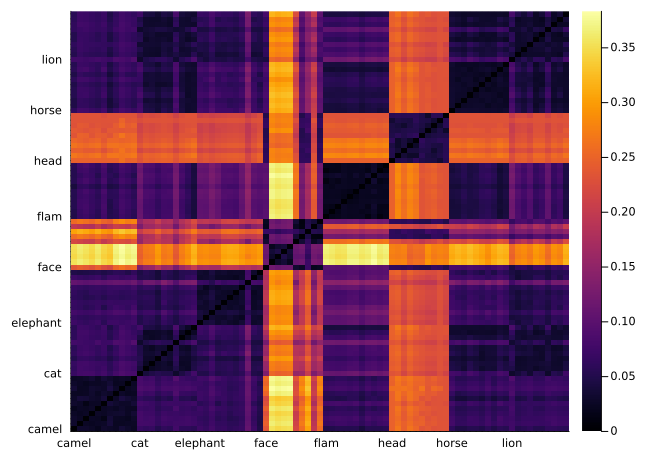

In [40]:
using Clustering, StatsPlots

labels = pds_df.Class |> copy
for i ∈ 2:length(pds_df.Class)
    if labels[i] == pds_df.Class[i-1]
        labels[i] = ""
    end
end

plot(DB, st = :heatmap, xticks = (1:83, labels), yticks = (1:83, labels))

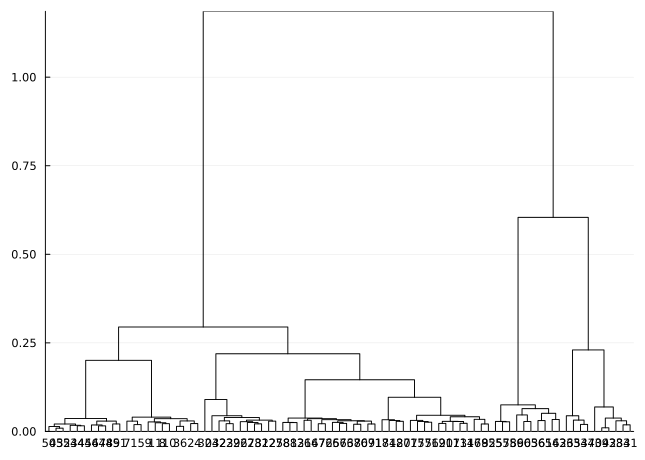

In [41]:
hc = hclust(DB, linkage=:ward)
plot(hc)

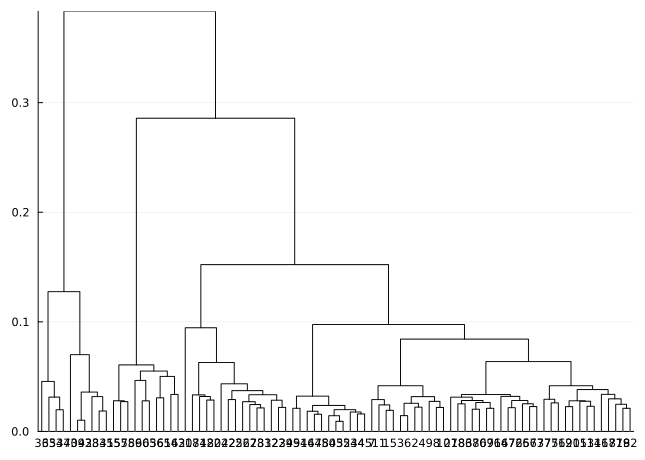

In [42]:
hc = hclust(DB, linkage=:complete)
plot(hc)

In [43]:
pds_df.Nearest_class .= ""

ids_reference = findall(x -> occursin("-reference", x), pds_df.Path)
names_reference = pds_df.File[ids_reference]

for i ∈ 1:83
    id = sortperm(DB[i, ids_reference])[1]
    pds_df.Nearest_class[i] = names_reference[id]
end

pds_df

Row,Path,Persistence_diagram,File,Class,Nearest_class
,String,Array…,SubStrin…,SubStrin…,String
1,meshes/camel-poses/camel-01,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 64-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-01,camel,camel-reference
2,meshes/camel-poses/camel-02,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 62-element 1-dimensional PersistenceDiagram, 5-element 2-dimensional PersistenceDiagram]",camel-02,camel,camel-reference
3,meshes/camel-poses/camel-03,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 79-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-03,camel,camel-reference
4,meshes/camel-poses/camel-04,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 75-element 1-dimensional PersistenceDiagram, 3-element 2-dimensional PersistenceDiagram]",camel-04,camel,camel-reference
5,meshes/camel-poses/camel-05,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 68-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-05,camel,camel-reference
6,meshes/camel-poses/camel-06,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 71-element 1-dimensional PersistenceDiagram, 2-element 2-dimensional PersistenceDiagram]",camel-06,camel,camel-reference
7,meshes/camel-poses/camel-07,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 78-element 1-dimensional PersistenceDiagram, 4-element 2-dimensional PersistenceDiagram]",camel-07,camel,camel-reference
8,meshes/camel-poses/camel-08,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 73-element 1-dimensional PersistenceDiagram, 4-element 2-dimensional PersistenceDiagram]",camel-08,camel,camel-reference
9,meshes/camel-poses/camel-09,"PersistenceDiagram[350-element 0-dimensional PersistenceDiagram, 83-element 1-dimensional PersistenceDiagram, 5-element 2-dimensional PersistenceDiagram]",camel-09,camel,camel-reference


In [44]:
pds_df.Acertou = @. (split.(pds_df.Class, "-") .|> first) == (split.(pds_df.Nearest_class, "-") .|> first)

83-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0
 0
 ⋮
 0
 0
 0
 0
 1
 0
 1
 1
 0
 1
 1
 1

In [45]:
pds_df.Acertou |> mean

0.7228915662650602